Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')

In [9]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
cdf = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,11.580881,256.228679
std,0.0,1.415895,1.797447,3.485595,63.372304
min,2014.0,1.000000,3.000000,4.700000,108.000000
25%,2014.0,2.000000,4.000000,9.000000,207.000000
50%,2014.0,3.400000,6.000000,10.900000,251.000000
75%,2014.0,4.300000,8.000000,13.350000,294.000000
max,2014.0,8.400000,12.000000,25.800000,488.000000


## Visualize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024897DD0CC8>,
      dtype=object)

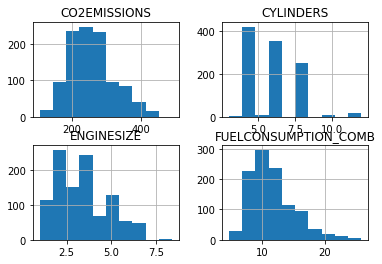

In [16]:
cdf.hist()

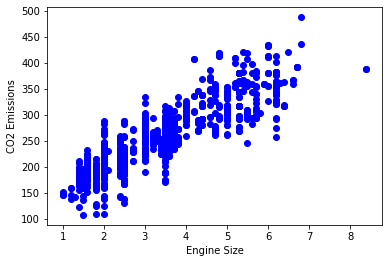

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

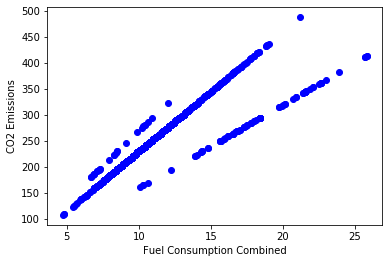

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Fuel Consumption Combined')
plt.ylabel('CO2 Emissions')
plt.show()

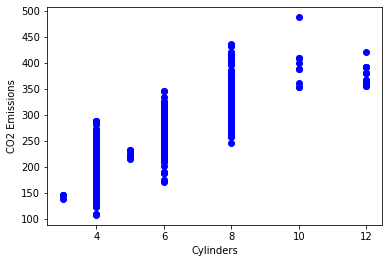

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']], cdf[['CO2EMISSIONS']], test_size=0.2)

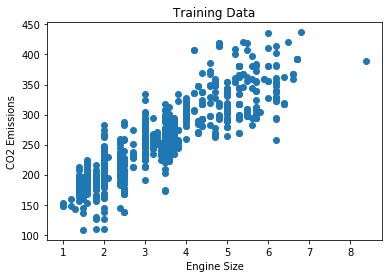

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.title('Training Data')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

## Linear Model (1 Feature -> 1 Label)

In [22]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[38.69244236]]
[126.98768229]


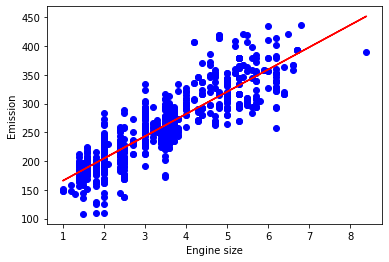

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(x_train, model.coef_[0][0]*x_train + model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [24]:
from sklearn import metrics
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = model.predict(x_test)
print("MSE %.2f" % np.mean((y_hat - y_test) ** 2))
print('RSE: %.2f' % np.mean((y_hat - y_test) ** 2) ** 0.5)
print('R2-Score: %.2f' % metrics.r2_score(y_test, y_hat))

MSE 26.60
RSE: 1156.74
R2-Score: 0.76


In [25]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [26]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']], cdf[['CO2EMISSIONS']], test_size=0.2)

## Linear Model (3 Features -> 1 Label)

In [28]:
model = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[10.12208422  8.31260242  9.44313912]]
[65.00132415]


In [30]:
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = model.predict(x_test)
print('RSE: %.2f' % np.mean((y_hat - y_test) ** 2) ** 0.5)
print('Variance Score: %.2f' % model.score(x_train, y_train))

RSE: 629.65
Variance Score: 0.86


## Linear Model (4 Features -> 1 Label)

In [34]:
model = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(x_train, y_train)
print('Coef: ', model.coef_)
print('Int: ', model.intercept_)

x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = model.predict(x_test)
print('RSE: %.2f' % np.mean((y_hat - y_test) ** 2) ** 0.5)
print('Variance Score: %.2f' % model.score(x_train, y_train))

Coef:  [[10.07642374  8.58016466  4.52438325  5.12695511]]
Int:  [64.23402144]
RSE: 638.50
Variance Score: 0.86
